<a href="https://colab.research.google.com/github/Lusungu-svg/alx-low_level_programming/blob/master/Copy_of_endprojectindividual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title: Empowering Smallholder Farmers Through Global Crop Yield Prediction**




In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, recall_score
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load files
data_path = ''
train = pd.read_csv(data_path + 'Train.csv')
test = pd.read_csv(data_path + 'Test.csv')
sample_submission = pd.read_csv(data_path + 'SampleSubmission.csv')
var_desc = pd.read_csv(data_path + 'VariableDescription.csv')

In [ ]:
# Preview files
train.head()


,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,...,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,...,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,...,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,...,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,...,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


In [ ]:
test.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre
0,ID_F9XXEXN2ADR2,Jamui,Khaira,20,13,TractorPlough,2022-07-24,4,Manual_PuddledLine,2022-07-03,...,Broadcasting,hand,2022-12-02,500.0,2022-12-28,hand,22,10,plowed_in_soil,0.272727
1,ID_SO3VW2X4QO93,Jamui,Khaira,25,25,TractorPlough,2022-07-24,5,Manual_PuddledRandom,2022-07-08,...,Broadcasting,hand,2022-11-12,150.0,2022-12-20,machine,28,10,plowed_in_soil,0.227273
2,ID_UKUQ7JM8E894,Nalanda,Rajgir,30,30,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-07,5,Manual_PuddledRandom,2022-06-24,...,Broadcasting,hand,2022-11-24,1200.0,2022-12-05,machine,28,10,plowed_in_soil,0.281250
3,ID_QUISMWEZR2H4,Vaishali,Mahua,15,10,WetTillagePuddling TractorPlough BullockPlough...,2022-07-04,5,Manual_PuddledRandom,2022-06-20,...,SoilApplied,hand,2022-10-15,300.0,2022-10-25,hand,30,10,plowed_in_soil,0.136364
4,ID_25JGI455VKCZ,Nalanda,Rajgir,30,10,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-21,3,Manual_PuddledRandom,2022-06-24,...,Broadcasting,machine,2022-11-20,NaN,2022-11-20,machine,26,40,plowed_in_soil,0.312500


In [ ]:
sample_submission.head()

,ID,Yield
0,ID_F9XXEXN2ADR2,0
1,ID_SO3VW2X4QO93,0
2,ID_UKUQ7JM8E894,0
3,ID_QUISMWEZR2H4,0
4,ID_25JGI455VKCZ,0


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Yield']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Yield'}, axis=1)
              .sort_values('Yield', ascending=True))
  xs = counted['Yield']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Yield', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ID')):
  _plot_series(series, series_name, i)
  fig.legend(title='ID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Yield')
_ = plt.ylabel('count()')

In [ ]:
# split data for training and local testing
X = train.drop(['ID', 'Yield'], axis=1)
X = X.select_dtypes(include=np.number)
y = train.Yield

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)


In [ ]:
# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.fillna(0))
X_test_scaled = scaler.transform(X_test.fillna(0))

In [ ]:
# Instantiate models
random_forest_model = RandomForestRegressor(random_state=1234)
xgboost_model = XGBRegressor(random_state=1234)

# Stack models
estimators = [
    ('rf', random_forest_model),
    ('xgb', xgboost_model)
]
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

In [ ]:
# Fit models
random_forest_model.fit(X_train_scaled, y_train)
xgboost_model.fit(X_train_scaled, y_train)
stacking_model.fit(X_train_scaled, y_train)

# Make predictions
rf_preds = random_forest_model.predict(X_test_scaled)
xgb_preds = xgboost_model.predict(X_test_scaled)
stacking_preds = stacking_model.predict(X_test_scaled)


In [ ]:
# Evaluate model performance
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)
xgb_rmse = mean_squared_error(y_test, xgb_preds, squared=False)
stacking_rmse = mean_squared_error(y_test, stacking_preds, squared=False)

rf_recall = recall_score(y_test > 0, rf_preds > 0)  # Assuming binary classification for recall
xgb_recall = recall_score(y_test > 0, xgb_preds > 0)
stacking_recall = recall_score(y_test > 0, stacking_preds > 0)

# Print evaluation metrics
print(f"Random Forest RMSE: {rf_rmse}, Recall: {rf_recall}")
print(f"XGBoost RMSE: {xgb_rmse}, Recall: {xgb_recall}")
print(f"Stacking RMSE: {stacking_rmse}, Recall: {stacking_recall}")



Random Forest RMSE: 398.6132548500286, Recall: 1.0
XGBoost RMSE: 419.9550082664907, Recall: 0.9917355371900827
Stacking RMSE: 397.9862903231922, Recall: 1.0


In [ ]:
!pip install sklearn.tree

ERROR: Could not find a version that satisfies the requirement sklearn.tree (from versions: none)
ERROR: No matching distribution found for sklearn.tree


In [ ]:
from sklearn.tree import plot_tree

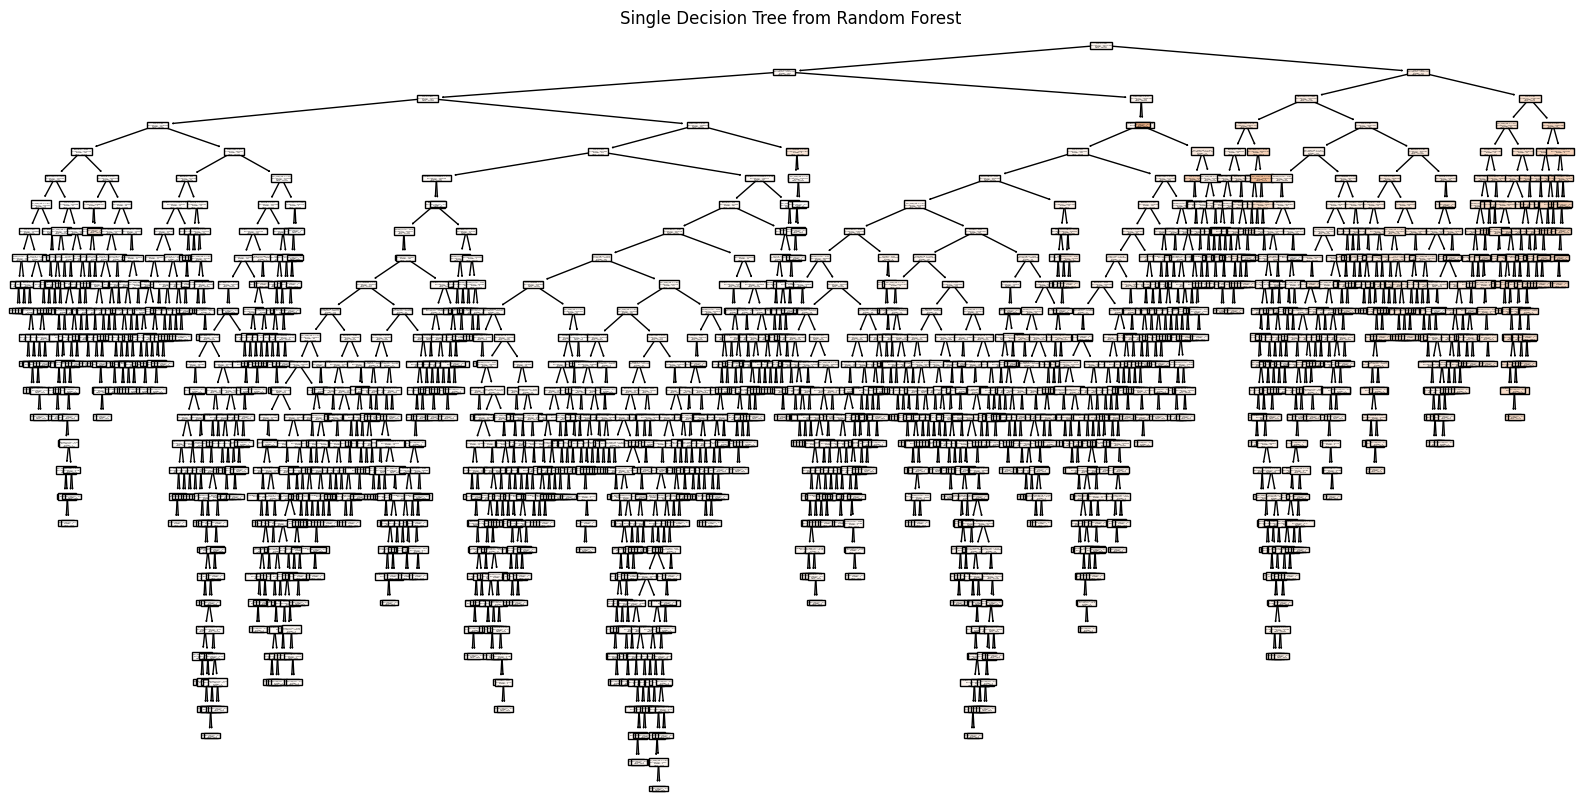

In [ ]:
# Visualize a single decision tree from Random Forest
plt.figure(figsize=(20, 10))
plot_tree(random_forest_model.estimators_[0], feature_names=X.columns, filled=True)
plt.title("Single Decision Tree from Random Forest")
plt.show()


Text(0.5, 1.0, 'XGBoost Predictions vs. Actual')

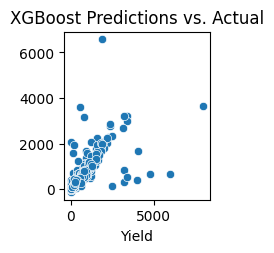

In [ ]:
# XGBoost Predictions
plt.subplot(2, 3, 2)
sns.scatterplot(x=y_test, y=xgb_preds)
plt.title("XGBoost Predictions vs. Actual")

In [ ]:
print(stacking_preds.ndim)

1


In [ ]:
if stacking_preds.ndim > 1:
    stacking_preds = stacking_preds.reshape(-1)

Text(0.5, 1.0, 'Stacking Predictions vs. Actual')

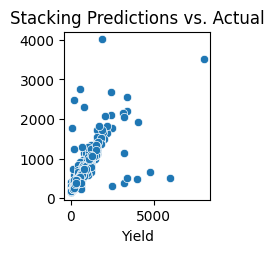

In [ ]:
plt.subplot(2, 3, 3)
sns.scatterplot(x=y_test, y=stacking_preds)
plt.title("Stacking Predictions vs. Actual")

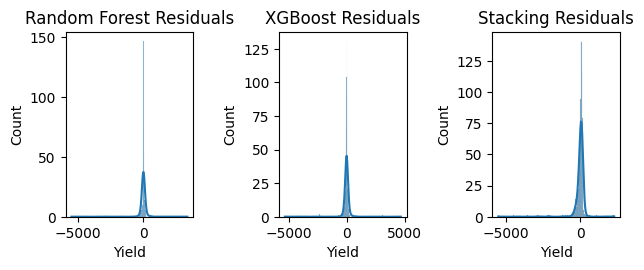

In [ ]:
# Random Forest Residuals
plt.subplot(2, 3, 4)
sns.histplot(rf_preds - y_test, kde=True)
plt.title("Random Forest Residuals")

# XGBoost Residuals
plt.subplot(2, 3, 5)
sns.histplot(xgb_preds - y_test, kde=True)
plt.title("XGBoost Residuals")

# Stacking Residuals
plt.subplot(2, 3, 6)
sns.histplot(stacking_preds - y_test, kde=True)
plt.title("Stacking Residuals")

plt.tight_layout()
plt.show()

In [ ]:
# Make predictions on the submission test
test_df = test[X.columns]
rf_preds = random_forest_model.predict(test_df.fillna(0))
xgb_preds = xgboost_model.predict(test_df.fillna(0))
stacking_preds = stacking_model.predict(test_df.fillna(0))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
# Create submission files
rf_sub = pd.DataFrame({'ID': test.ID, 'Yield': rf_preds})
xgb_sub = pd.DataFrame({'ID': test.ID, 'Yield': xgb_preds})
stacking_sub = pd.DataFrame({'ID': test.ID, 'Yield': stacking_preds})

rf_sub.to_csv('RandomForestSubmission.csv', index=False)
xgb_sub.to_csv('XGBoostSubmission.csv', index=False)
stacking_sub.to_csv('StackingSubmission.csv', index=False)

rf_sub.head()

,ID,Yield
0,ID_F9XXEXN2ADR2,2103.08
1,ID_SO3VW2X4QO93,1229.47
2,ID_UKUQ7JM8E894,898.13
3,ID_QUISMWEZR2H4,1303.87
4,ID_25JGI455VKCZ,1660.33


from matplotlib import pyplot as plt
_df_2['Yield'].plot(kind='hist', bins=20, title='Yield')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Yield'].plot(kind='line', figsize=(8, 4), title='Yield')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['ID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='Yield', y='ID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
!pip install pywedge

In [ ]:
import pywedge as pw
import pandas as pd

# Assuming you have a DataFrame named df
mc = pw.Pywedge_Charts(train, c=None, y='Acre')


/usr/local/lib/python3.10/dist-packages/pywedge/pywedge.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  self.X = self.train.drop(self.y,1)


**DASHBOARD**

In [ ]:
charts = mc.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')